In [169]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets
from ipywidgets import *
from IPython.display import display
import IPython
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from datetime import datetime
import talib
import pandas_ta as ta
# from talib.abstract import *
from math import *
from collections import OrderedDict
# import vectorbt as vbt    
import json
%matplotlib inline

matplotlib.rcParams.update({'font.size': 7, 'lines.linewidth': 0.7, 'figure.dpi': 300})

In [170]:
df = pd.read_json(r'./freq-user-data/data/binance/BTC_USDT-1m.json').dropna()
df.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']

df['date'] = pd.to_datetime(df['timestamp'], unit='ms', utc=False)
# df.index = df['time']
# df.set_index('time', drop=True, inplace=True)
df.set_index(pd.DatetimeIndex(df["date"]), inplace=True, drop=True)
# df = df[['time', 'symbol', 'source', 'resolution', 'open', 'high', 'low', 'close', 'volume']]
# df.to_csv (r'./data/binance/BTC_USDT-5m.csv', index = None)
# df.set_index('time')
df = df.sort_index()

In [485]:
# pd.Timestamp('now').floor('D') + pd.Timedelta(-7, unit='D')

# start_time = datetime(2021,5,1)

start_time = pd.Timestamp('now') + pd.Timedelta(-10, unit='W')
# start_time
ddf = df.loc[df.index >= start_time].copy()
# ddf = df.loc[df['time'] >= start_time]
# ddf

# ddf = ddf.resample('5Min').agg(
#     OrderedDict([
#         ('open', 'first'),
#         ('high', 'max'),
#         ('low', 'min'),
#         ('close', 'last'),
#         ('volume', 'sum'),
#     ])
# ).dropna()

# ema = ddf.close.ewm(span=50,min_periods=0,adjust=False,ignore_na=False).mean()
# detrended = ddf.close - ddf.ema

ddf['lret'] = ddf.close.apply(np.log).diff(1).fillna(0)
ddf['cumlret'] = ddf.lret.cumsum()

dlen = len(ddf.index)
dlen

95640

In [393]:
# wdf = ddf[(ddf.index >'2012-07-01') & (ddf.index <'2012-07-04')].copy()
# ddf.lret
# wdf.groupby(g_buy_sig_cum).lret.tail(1)
# wdf.lret
# buy_cond
# wdf.lret
# wdf[wdf.buy]
sell_sig = pd.Series(False, wdf.index)
sell_sig[wdf.groupby(g_buy_sig_cum).tail(1).index] = True
# sell_sig[sell_sig]
# g_buy_sig_cum
buy_sig[buy_sig]


date
2021-06-20 10:20:00    True
2021-06-21 00:20:00    True
2021-06-21 02:45:00    True
2021-06-21 03:50:00    True
dtype: bool

In [442]:
sell_cond[sell_cond]

date
2021-06-20 08:20:00    True
2021-06-20 08:25:00    True
2021-06-20 08:30:00    True
2021-06-20 08:35:00    True
2021-06-20 08:40:00    True
                       ... 
2021-06-21 05:15:00    True
2021-06-21 05:20:00    True
2021-06-21 05:25:00    True
2021-06-21 05:30:00    True
2021-06-21 05:35:00    True
Freq: 5T, Length: 256, dtype: bool

In [447]:
sell_sig[sell_sig].groupby(g_buy_sig_cum).head(1)

date
2021-06-20 09:05:00    True
2021-06-20 09:50:00    True
2021-06-20 10:05:00    True
2021-06-21 02:35:00    True
2021-06-21 03:30:00    True
2021-06-21 04:00:00    True
dtype: bool

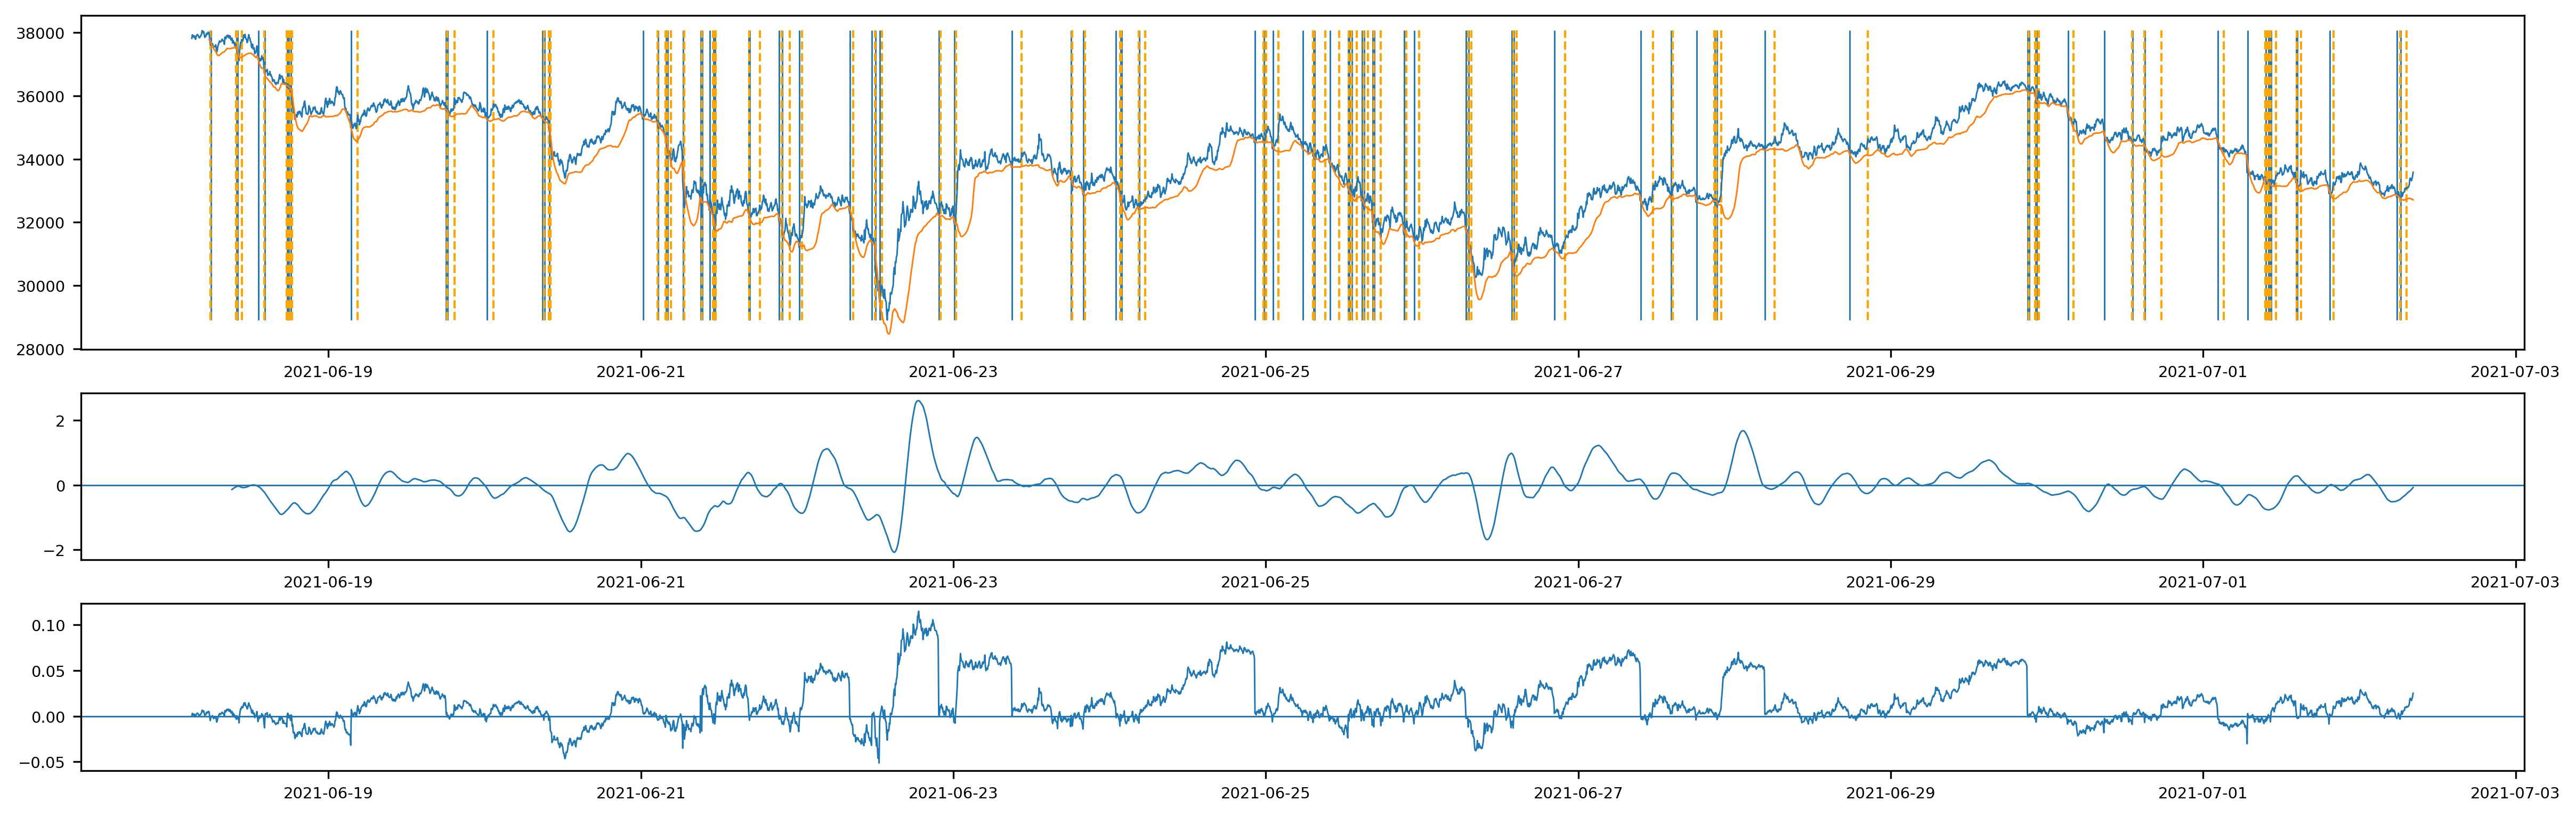

In [486]:
stoploss = 1.
take_proffit = 1.


buy_cond = (
    (wdf.close < wdf.bb_lower) 
    # (wdf.conv1 > 0)
)

# wdf['buy'] = 
buy_sig = (buy_cond & ((~buy_cond).shift())).shift().bfill()
g_buy_sig_cum = buy_sig.cumsum()
buy_sig = wbsig = buy_sig[buy_sig]

wdf['posret'] = wdf.groupby(g_buy_sig_cum).lret.cumsum()

sell_sig = pd.Series(False, wdf.index)
sell_sig[sell_sig.groupby(g_buy_sig_cum).tail(1).index] = True

sell_cond = (
    (wdf.posret <= - stoploss/100) |
    (wdf.posret >= take_proffit/100) |
    sell_sig
)

sell_sig = (sell_cond & ((~sell_cond).shift())) #.shift().bfill()

sell_sig = sell_sig[sell_sig].groupby(g_buy_sig_cum).head(1)

# sell_sig = sell_sig[sell_sig]

fig = plt.figure(constrained_layout=True,figsize=(16,5))

gs00 = fig.add_gridspec(3, 1, height_ratios=[2,1,1])

ax001 = fig.add_subplot(gs00[0,0])
ax002 = fig.add_subplot(gs00[1,0], sharex=ax001)
ax003 = fig.add_subplot(gs00[2,0], sharex=ax001)

# ax1 = plt.subplots(1, 1)
ax001.plot(wdf.close)
ax001.plot(wdf.bb_lower)
ax001.vlines(buy_sig.index, wdf.close.min(), wdf.close.max())
ax001.vlines(sell_sig.index, wdf.close.min(), wdf.close.max(), color='orange', lw=1, linestyle='--')

ax002.plot(wdf.conv1)
ax002.axhline()

ax003.plot(wdf.posret)
ax003.axhline()
# wdf['sell_sig'] = sell_sig = (sell_cond & ((~sell_cond).shift())).shift().bfill()
# wdf['g_sell_sig_cum'] = g_sell_sig_cum = sell_sig.cumsum()


# wdf['posret'] = wdf.groupby(g_buy_sig_cum).lret.cumsum()

# sell_sig = pd.DataFrame(wdf.index);sell_sig['sell_sig'] = False
# sell_sig.loc[wdf.groupby(g_buy_sig_cum).tail(1).index] = True

# sell_cond = (
#     (wdf.posret <= - stoploss/100) |
#     (wdf.posret >= take_proffit/100) |
#     sell_sig
# )
# wbsig


# sell_cond = (
#     (wdf.posret <= stoploss) |
#     (wdf.posret >= take_proffit)
# )
# sell_sig = (sell_cond & ((~sell_cond).shift())).shift().bfill()
# # g_sell_sig_cum = sell_sig.cumsum()
# wssig = sell_sig[sell_sig]
# wssig = wdf.loc[wssig.index]
# # len(wbsig), len(wssig)
# wprofits = wssig[wssig.posret > 0]
# wlosses = wssig[wssig.posret <= 0]
# sell_cond[sell_cond]
    # tret = wssig.posret.cumsum()
# wdf.loc[wssig.index]

In [513]:

sl_n2= IntSlider(description="n2", min=0, max=ceil(log(dlen, 2.0)), step=1, value=9)
sl_w = IntSlider(description="w", min=0, max=floor(dlen/pow(2,9)), step=1, value=5)
def update_sl_w_range(*args):
    wsize = pow(2,sl_n2.value + 1)
    sl_w.max = floor(dlen/wsize)*2 
sl_n2.observe(update_sl_w_range, 'value')

wdg_bb_ma = widgets.IntText(value=50,description='bbma:',disabled=False,continuous_update=False)
wdg_bb_stn = widgets.IntText(value=50,description='bbstn:',disabled=False,continuous_update=False)
wdg_bb_std = widgets.FloatText(value=3,step=0.2,description='bbstd:',disabled=False,continuous_update=False)

wdg_krn = widgets.FloatText(value=1,step=0.25,description='krn:',disabled=False,continuous_update=False)
wdg_krpow = widgets.FloatText(value=1, step=0.05,description='krpow:',disabled=False,continuous_update=False)
wdg_krstart = widgets.FloatText(value=1, step=1/6.,description='krstrt:',disabled=False,continuous_update=False)
wdg_krend = widgets.FloatText(value=2, step=1/6.,description='krend:',disabled=False,continuous_update=False)
wdg_krflip = widgets.Checkbox(value=False,description='krflip:',disabled=False,continuous_update=False)
wdg_krflipy = widgets.Checkbox(value=False,description='krflipy:',disabled=False,continuous_update=False)


wdg_cnv = FloatRangeSlider(description="cnv", min=-10, step=0.05, max=10,value=[0,1],continuous_update=False)
# slCoolOff = IntSlider(description="cool", min=0, step=5, max=600, value=30)
# slDowntrendWait = IntSlider(description="dnt", min=0, max=100, value=30)

wdg_stoploss = FloatText(description="sl", min=0, step=0.05, max=15,value=1.92)
# slTrailingStopLoss = FloatSlider(description="ts", min=0, step=0.2, max=15,value=10)
wdg_take_proffit = FloatText(description="tp", min=0, step=0.1, max=15, value=10)


# slXrr = FloatSlider(description="xrr", min=1, step=0.2, max=20, value=2)

ui = widgets.VBox([
    widgets.HBox([sl_n2, sl_w, wdg_stoploss, wdg_take_proffit]),
    widgets.HBox([wdg_bb_ma, wdg_bb_stn, wdg_bb_std, wdg_cnv]),
    widgets.HBox([wdg_krn, wdg_krstart, wdg_krend, wdg_krpow, wdg_krflip, wdg_krflipy])
    # widgets.HBox([slTrailingStopLoss, slStopLoss, slTakeProfit, slXrr]),
#     widgets.HBox([slStK, slStD, slStSm, slStT])
])


wst = wed = wsz = wdf = dbbf = buy_sig = g_buy_sig_cum = buy_cond = sell_cond = sell_sig = False

def printer(w2log, w, stoploss, take_proffit, bbma, bbstn, bbstd, krn, krstart, krend, krpow, krflip, krflipy, cnv):

    with open(f'./strat-params-bbands-convol.json', "w") as f: f.write(json.dumps({k: v.value for k, v in dvals.items()})) 
    krnn = floor(krn * 60)
    krx = np.linspace(krstart, krend, krnn)
    kry = krx
    # kry = np.cos(kry)
    # kry = np.exp(kry)

    kry = np.tan(kry)
    kry = np.sin(kry)
    kry = np.power(kry , krpow)
    if krflip: kry = np.flipud(kry)
    if krflipy: kry = -(kry)
    kry = kry - np.mean(kry)
    
    # kry = kry * 100
    # kry = kry - kry.mean

    ddf['bb_middle'] = ddf.close.ewm(span=bbma,min_periods=0,adjust=False,ignore_na=False).mean()
    ddf['bb_std'] = ddf.close.rolling(bbstn).std()
    ddf['bb_std_bw'] = ddf.bb_std * bbstd
    ddf['bb_lower'] = ddf['bb_middle'] - ddf.bb_std_bw

    global wst, wed, wsz, stoch, wdf, buy_cond, buy_sig, g_buy_sig_cum, sell_cond, sell_sig
    wsz = floor(pow(2,w2log))
    wst = floor(w * wsz / 2)
    wed = floor(wst + wsz)
    
    # tentries = ddf['entries'] = s.vbt.signals.first()
    wdf = ddf.iloc[wst:wed,:].copy()

    wdf['conv1'] = wdf.cumlret.rolling(krnn).apply(lambda v: (v * kry).sum())

    buy_cond = (
        (wdf.close < wdf.bb_middle) &
        (wdf.conv1 >= cnv[0]) &
        (wdf.conv1 <= cnv[1])
    )

    buy_sig = (buy_cond & ((~buy_cond).shift())).shift().bfill()
    g_buy_sig_cum = buy_sig.cumsum()
    wbsig = buy_sig[buy_sig]
    
    wdf['posret'] = wdf.groupby(g_buy_sig_cum).lret.cumsum()
 
    sell_sig = pd.Series(False, wdf.index)
    sell_sig[sell_sig.groupby(g_buy_sig_cum).tail(1).index] = True

    sell_cond = (
    (wdf.posret <= - stoploss/100) |
    (wdf.posret >= take_proffit/100) |
    sell_sig
    )

    sell_sig = (sell_cond & ((~sell_cond).shift())) #.shift().bfill()

    sell_sig = sell_sig[sell_sig].groupby(g_buy_sig_cum).head(1)

    wssig = wdf.loc[sell_sig.index].posret
    wssig = wssig - 0.002

    wprofits = wssig[wssig > 0]
    wlosses = wssig[wssig <= 0]

    tret = wssig.cumsum()

    
    # texits = vbt.OHLCSTEX.run(
    #     tentries, 
    #     ddf['open'], 
    #     ddf['high'], 
    #     ddf['low'], 
    #     ddf['close'], 
    #     sl_stop=sl/100,
    #     tp_stop=tp/100,
    #     ts_stop=ts/100
    # #     stop_type=None, hit_price=None
    # ).exits

    # global pf;
    # pf = vbt.Portfolio.from_signals(ddf['close'], entries=tentries, exits=texits, direction='longonly', 
    #                                 init_cash=capital, fees=0.001, slippage=0.0025, freq='1m')

    # global trades
    # trades = pf.trades.records
    # trades['cap'] = trades['pnl'].cumsum() + capital
    # ddf_cap = pd.merge(ddf[["date"]], trades[["exit_idx", "cap"]], left_on=idx_ddf, right_index=False, 
    #          right_on="exit_idx", how="left", sort=False).fillna(method='ffill').set_index('date')

    
#     with open(f'./strategy-results/{datetime.now():strat_%Y-%m-%d}.log', "a") as f: 
#         f.write(json.dumps(dict({   
#             "dt": f'{datetime.now():%Y-%m-%d %HH:%MM:%SS}',
#             "period_start": f'{ddf.index[0]}',
#             "period_end": f'{ddf.index[-1]}',
#             "params": dict({ 'sl': sl, 'ts': ts, 'tp': tp, 'ma1n': ma1n, 'ma2n': ma2n, 'ma1c': ma1c, 'ma2c': ma2c, 'trn': trn, 'mrn': mrn, 'xrr': xrr
# #                         'std': std, 'stk': stk, 'stsm': stsm, 'stt': slStT.value
#                            }),
#             "strategy": "2EMASTH",
#             "profit": floor(100* (trades.iloc[-1].cap / capital - 1)) if len(trades.index) else 0. 
#         })
#     )); f.write("\n");
    
    
    # trades_profits = trades[trades['pnl'] > 0]
    # trades_losses = trades[trades['pnl'] < 0]    
    
    # ddf_entries =  ddf.iloc[trades['entry_idx'].values]
    # ddf_profits = ddf.iloc[trades_profits['exit_idx'].values]
    # ddf_losses = ddf.iloc[trades_losses['exit_idx'].values]
    
    plt.close("all")
#     fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,4), sharex='col', gridspec_kw={'width_ratios': [3,1]})
    fig = plt.figure(constrained_layout=True,figsize=(16,5))
    gs0 = fig.add_gridspec(1, 2, width_ratios=[3,1])

    gs00 = gs0[0,0].subgridspec(3, 1, height_ratios=[3,1,1])
    gs01 = gs0[0,1].subgridspec(4, 1)

    ax001 = fig.add_subplot(gs00[0,0])
    ax002 = fig.add_subplot(gs00[1,0], sharex=ax001)
    ax003 = fig.add_subplot(gs00[2,0], sharex=ax001)

    ax101 = fig.add_subplot(gs01[0,0])
    ax102 = fig.add_subplot(gs01[1,0])
    ax103 = fig.add_subplot(gs01[2,0])
    ax104 = fig.add_subplot(gs01[3,0])


#     wma1 = wdf['ma1']; wma2 = ma2[wdf.index]; wma3 = ma3[wdf.index];
    wclose_min = wdf.close.min()
    wclose_max = wdf.close.max()

    ax001.plot(wdf['close'])
    ax001.plot(wdf['low'], lw=0.5)
    ax001.plot(wdf['high'], lw=0.5)
    ax001.plot(wdf.bb_middle)
    # ax001.plot(wdf.ema*0.98, linestyle='dotted', lw=1)
    ax001.plot(wdf.bb_lower)
    ax001.vlines(wbsig.index, wclose_min , wclose_max, lw=0.5)
    if len(wprofits) > 0: ax001.vlines(wprofits.index, wclose_min , wclose_max, lw=0.5, color="g")
    if len(wlosses) > 0: ax001.vlines(wlosses.index, wclose_min , wclose_max, lw=0.5, color="r")
    # ax1.plot(wdf['rmin'], lw=0.5)
    
    ax001.fill_between(wdf.index, wdf.bb_middle*0.99, wdf.bb_middle*1.01, alpha=0.15)
    # ax1.fill_between(wdf.index, wdf['ma2'], wdf['ma2c'][wdf.index], alpha=0.15)

    ax002.plot(wdf.conv1)
    ax002.vlines(wbsig.index, wdf.conv1.min() , wdf.conv1.max(), lw=0.5)
    ax002.axhline(color='b', linestyle='--')

    # ax003.plot(g_buy_sig_cum)
    ax003.plot(tret)
    ax003.axhline(color='b', linestyle='--')
    
    # ax002.axhline(y=-1, linestyle='--')
    # ax002.axhline(y=-2, linestyle='--')
    # ax002.axhline(y=-4, linestyle='--')
    # ax002.axhline(y=1, linestyle='--')
    # ax002.axhline(y=2, linestyle='--')
    # ax002.axhline(y=4, linestyle='--')
    # ax003.plot(wdf.bb_std)
    # ax003.axhline(color='b', linestyle='--')


    ax101.plot(krx, kry)
    ax101.axhline(color='b', linestyle='--')

    ax102.plot(tret)
    ax102.axhline(color='b', linestyle='--')

    # wddf_entries = ddf_entries[ddf_entries.index.isin(wdf.index)]
    # wddf_profits = ddf_profits[ddf_profits.index.isin(wdf.index)]
    # wddf_losses = ddf_losses[ddf_losses.index.isin(wdf.index)]
    
    # wddf_trades = ddf_cap[wst:wed]
    
    
    # ax1.vlines(wddf_entries.index,wddf_entries['open'] * 0.97,wddf_entries['open'] * 1.02, lw=0.5, color='blue')
    # ax1.vlines(wddf_profits.index,wddf_profits['open'] *0.97,wddf_profits['open'] * 1.02, lw=0.5, color='green')
    # ax1.vlines(wddf_losses.index,wddf_losses['open'] * 0.97,wddf_losses['open'] * 1.02, lw=0.5, color='red')
    
    
    # ax2.plot(wdf.xrr,lw=0.5,color='green')

#     ax2.plot(wslowk,lw=0.5,color='orange')
#     ax2.plot(wslowd,lw=0.5,color='teal')
#     ax2.axhline(y=20, color='b', linestyle='--',lw=0.5)
#     ax2.axhline(y=80, color='b', linestyle='--',lw=0.5)
#     ax2.vlines(wddf_entries.index,0,100, lw=0.5, color='blue')
#     ax2.vlines(wddf_profits.index,0,100, lw=0.5, color='green')
#     ax2.vlines(wddf_losses.index,0,100, lw=0.5, color='red')

    
    # ax3.plot(ddf_cap['cap'])
    # ax4.plot(wddf_trades['cap'])
    
    plt.show()
    # print(pf.stats())
    # print(pf.returns_stats())
    

dvals = {"w2log":sl_n2, "w":sl_w, "stoploss": wdg_stoploss, "take_proffit": wdg_take_proffit,
    'bbma': wdg_bb_ma, 'bbstn': wdg_bb_stn, 'bbstd': wdg_bb_std,
    'krn': wdg_krn, 'krstart': wdg_krstart, 'krend': wdg_krend, 'krpow': wdg_krpow, 'krflip': wdg_krflip, 'krflipy': wdg_krflipy, 
    'cnv': wdg_cnv}


with open('./strat-params-bbands-convol.json') as f: 
    js = json.loads(f.read());
    for k, v in dvals.items(): 
        if k in js: v.value=js[k] ;
                                        

out = widgets.interactive_output(printer, dvals)
display(ui, out)



Output()

In [995]:
with open(f'./strat-params.json', "w") as f: f.write(json.dumps({"w2log": sl_n2.value, "w":sl_w.value, "sl":slStopLoss.value, "ts": slTrailingStopLoss.value, 
           "tp": slTakeProfit.value, "ma1n": slMa1N.value, "ma2n": slMa2N.value, "ma1c": slMa1c.value, "ma2c": slMa2c.value,"trn": slTrN.value, 'mrn': slMrN.value,
             'xrr': slXrr.value})) ;

#     "stk": slStK.value, "std": slStD.value, "stsm": slStSm.value, 'stt': slStT.value,
                    
# with open('./strat-params.json') as f: 
#     js = json.loads(f.read())
#     sl_n2.value=js["w2log"]; sl_w.value=js["w"]; slStopLoss.value=js["sl"]; slTrailingStopLoss.value=js["ts"]; slTrN.value=js["trn"];
#     slTakeProfit.value=js["tp"]; slMa1N.value=js["ma1n"]; slMa2N.value=js["ma2n"]; slMa1c.value=js["ma1c"]; slMa2c.value=js["ma2c"]; 
#     slStK.value=js['stk']; slStD.value=js['std']; slStSm.value=js['stsm'];



In [512]:

wdg_krn = widgets.IntText(value=50,description='krn:',disabled=False)
wdg_krpow = widgets.FloatText(value=1, step=0.05,description='krpow:',disabled=False)
wdg_krstart = widgets.FloatText(value=0, step=1/6.,description='krstrt:',disabled=False)
wdg_krend = widgets.FloatText(value=2, step=1/6.,description='krend:',disabled=False)
wdg_krflip = widgets.Checkbox(value=False,description='krflip:',disabled=False)
wdg_krflipy = widgets.Checkbox(value=False,description='krflipy:',disabled=False)
ui = widgets.VBox([
        widgets.HBox([wdg_krn, wdg_krstart, wdg_krend, wdg_krpow]),
        widgets.HBox([wdg_krflip, wdg_krflipy])
    ])
kry = False
def inter_plot(krn, krstart, krend, krpow, krflip, krflipy):
    global kry

    with open(f'./strat-params-fn-convol.json', "w") as f: f.write(json.dumps({k: v.value for k, v in dvals.items()})) 
    plt.close("all")
    krx = np.linspace(krstart, krend, krn)
    kry = krx
    # kry = np.sin(kry)
    # kry = np.power(kry , krpow)
    # kry = np.arctan(kry)
    # kry = np.power(kry , krpow)
    # kry = np.exp(kry)
    # kry = np.cos(kry)
    kry = np.tan(kry)
    kry = np.cos(kry)
    # kry = np.sin(kry)
    if krflip: kry = np.flipud(kry)
    if krflipy: kry = -(kry)
    kry = kry - np.mean(kry)
    # krnl = np.flipud(krnl) 
    fig, (ax1) = plt.subplots(1, 1,figsize=(2,0.5), sharex='col', gridspec_kw={'width_ratios': [1]})
    ax1.plot(krx, kry)
    # ax1.plot(krx, np.flipud(kry))

dvals = {'krn': wdg_krn, 'krstart': wdg_krstart, 'krend': wdg_krend, 'krpow': wdg_krpow,
    'krflip': wdg_krflip, 'krflipy': wdg_krflipy}


with open('./strat-params-fn-convol.json') as f: 
    js = json.loads(f.read());
    for k, v in dvals.items(): 
        if k in js: v.value=js[k] ;

out = widgets.interactive_output(inter_plot, dvals)
display(ui, out)


Output()

In [269]:

buy_cond = (
    (wdf.close < wdf.bb_lower) &
    (wdf.conv1 > 0)
)
buy_sig = (buy_cond & ((~buy_cond).shift())).shift().dropna()
g_buy_sig_cum = buy_sig.cumsum()
wbsig = buy_sig[buy_sig]

In [260]:
# g_buy_cond.groupby(g_buy_cond).first()
# .plot(figsize=(9,3))

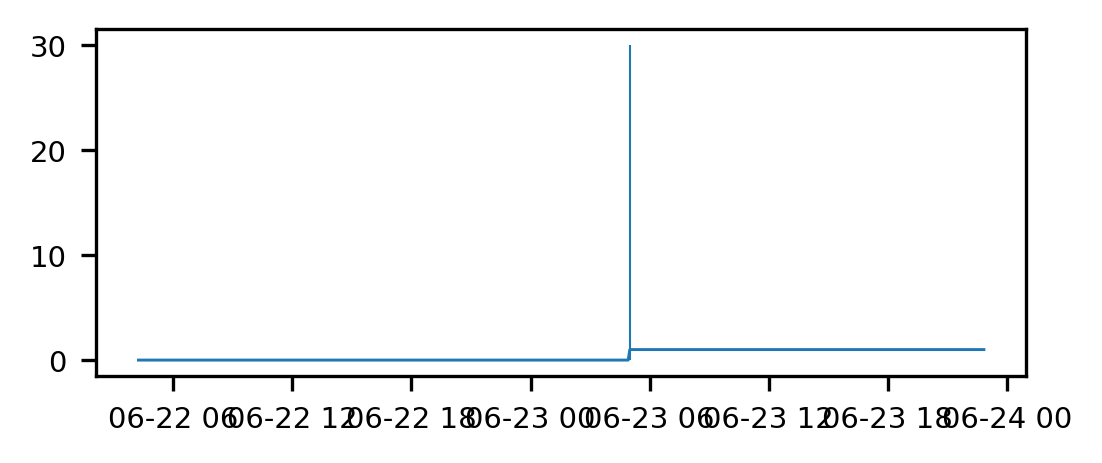

In [261]:
fig = plt.figure(figsize=(4,1.5),dpi=300)
ax = fig.add_subplot(1, 1, 1)
ax.plot(g_buy_sig_cum)
ax.vlines(wbsig.index, 0 , 30, lw=0.5)
# ax.plot(xdata2, ydata2, color='tab:orange')



In [230]:
buy_sig

date
2021-06-22 04:15:00     0
2021-06-22 05:30:00     1
2021-06-22 05:35:00     2
2021-06-22 08:00:00     3
2021-06-22 08:05:00     4
2021-06-22 08:10:00     5
2021-06-22 08:15:00     6
2021-06-22 08:20:00     7
2021-06-22 08:25:00     8
2021-06-22 08:35:00     9
2021-06-22 08:40:00    10
2021-06-22 08:45:00    11
2021-06-22 12:00:00    12
2021-06-22 12:05:00    13
2021-06-22 12:10:00    14
2021-06-22 12:20:00    15
2021-06-22 12:25:00    16
2021-06-22 12:35:00    17
2021-06-22 21:40:00    18
2021-06-23 00:05:00    19
2021-06-23 00:10:00    20
2021-06-23 00:15:00    21
2021-06-23 05:00:00    22
2021-06-23 08:55:00    23
2021-06-23 09:00:00    24
2021-06-23 15:10:00    25
2021-06-23 15:15:00    26
2021-06-23 18:00:00    27
2021-06-23 18:10:00    28
2021-06-23 18:15:00    29
2021-06-23 18:20:00    30
2021-06-23 19:55:00    31
2021-06-23 20:00:00    32
dtype: int64